# TP : Séries Chronologiques

## Réalisé par : DOUIH Zakaria et RAJI Ahmed - Filière DSE

Dans les séries chronologiques, les observations sont en fonction du temps, chaque année correspond à une instance dans le temps. Il y a donc une relation entre différents points de données du jeu de données. Un cas spécial de série chronologique est la série univariée où vous n'avez qu'une seule caractéristique à traiter.

### 1) Récupérer le fichier des données Sur Python.

Le jeu de données est généré à l'aide d'un dispositif loT (Internet of Things). Les données représentent les valeurs de la température dans la pièce en fonction du temps.


Récupération de données :

In [1]:
import pandas as pd
donnees=pd.read_csv("MLTempDataset1.csv")[:120]
donnees.tail()

,Unnamed: 0,Datetime,Hourly_Temp
115,115,2022-01-08 19:00:00,19.167
116,116,2022-01-08 20:00:00,18.100
117,117,2022-01-08 21:00:00,11.000
118,118,2022-01-08 22:00:00,13.233
119,119,2022-01-08 23:00:00,21.167


Renommer la colonne de données et supprimer la colonne 'Unamed: 0' pour simplifier le travail :

In [2]:
donnees.drop(columns='Unnamed: 0',inplace=True)
donnees.head()

,Datetime,Hourly_Temp
0,2022-01-04 00:00:00,20.867
1,2022-01-04 01:00:00,21.000
2,2022-01-04 02:00:00,20.867
3,2022-01-04 03:00:00,20.650
4,2022-01-04 04:00:00,20.400


In [3]:
donnees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Datetime     120 non-null    object 
 1   Hourly_Temp  120 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.0+ KB


On a besoin de la colonne Hourly_Temp comme donneés, et la colonne Datetime comme index :

In [4]:
from datetime import datetime
donnees['Datetime']=pd.to_datetime(donnees['Datetime'],infer_datetime_format=True)
donnees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Datetime     120 non-null    datetime64[ns]
 1   Hourly_Temp  120 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.0 KB


C:\Users\Ahmed\AppData\Local\Temp\ipykernel_4384\3484747543.py:2: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  donnees['Datetime']=pd.to_datetime(donnees['Datetime'],infer_datetime_format=True)


Le programme connait maintenant la date.

In [5]:
donnees.set_index('Datetime',inplace=True)
donnees.head()

,Hourly_Temp
Datetime,
2022-01-04 00:00:00,20.867
2022-01-04 01:00:00,21.000
2022-01-04 02:00:00,20.867
2022-01-04 03:00:00,20.650
2022-01-04 04:00:00,20.400


Les données sont prêts !

### 2) Diviser les données en un échantillon d'apprentissage et un échantillon de validation.

On va diviser les données en 80% pour l'apprentissage et 20% pour la validation.

In [6]:
taille_de_coupe=int(len(donnees)*0.8)
donnees_apprentissage=donnees[:taille_de_coupe] #données d'apprentissage
donnees_validation=donnees[taille_de_coupe:]#données de validation

### 3) Créer un objet de type série temporelle contenant cette série. Représenter graphiquement la série.

On va travailler sur les données d'apprentissage. On va, pour simplifier le travail, la rennomer en 'data' :

In [7]:
data=donnees_apprentissage
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 96 entries, 2022-01-04 00:00:00 to 2022-01-07 23:00:00
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Hourly_Temp  96 non-null     float64
dtypes: float64(1)
memory usage: 1.5 KB


La représentation graphique :

In [8]:
import matplotlib.pyplot as plt

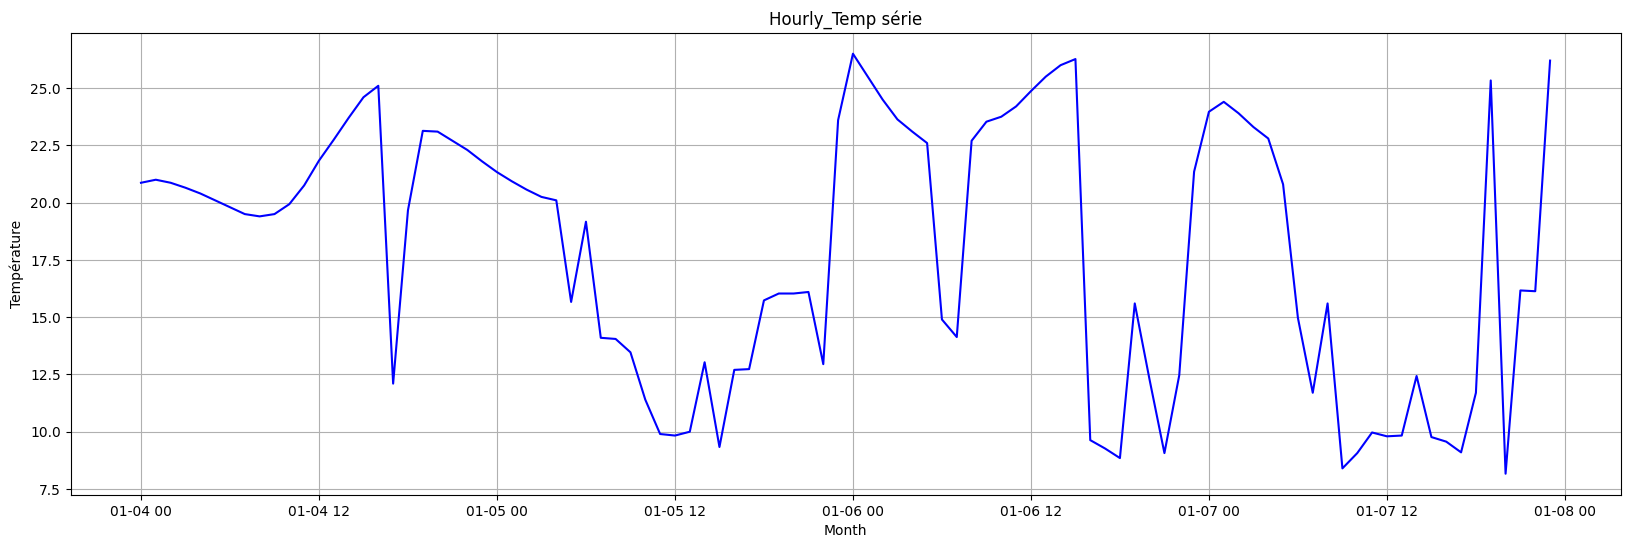

In [9]:
plt.figure(figsize=(20,6))
plt.plot(data.index,data['Hourly_Temp'], color='blue')
plt.title('Hourly_Temp série')
plt.xlabel('Month')
plt.ylabel('Température')
plt.grid(True)
plt.show()

Il est difficile, dans cet exemple de dire s'il y a une saisonalité mais, c'est quasiment clair qu'on aura pas une tendance.

### 4) Analyser qualitativement cette série, c’est-à-dire repérer d’éventuelles tendances et/ou saisonnalités.

On applique le test de Dickey-Fuller pour l'état stationnaire de notre série :

In [10]:
from statsmodels.tsa.stattools import adfuller
from tabulate import tabulate

result=adfuller(data)
table=[
    ['Valeur de test : ',result[0]],
    ['P-value : ',result[1]],
    ['Conclusion : ','La série est stationnaire' if result[1]<0.05 else 'La série est non stationnaire']
]
table

[['Valeur de test : ', -3.9588517418773743],
 ['P-value : ', 0.001641983268799892],
 ['Conclusion : ', 'La série est stationnaire']]

On remarque que la p-value est inférieur même à 1%, donc on rejette H_0 : la série est stationnaire !

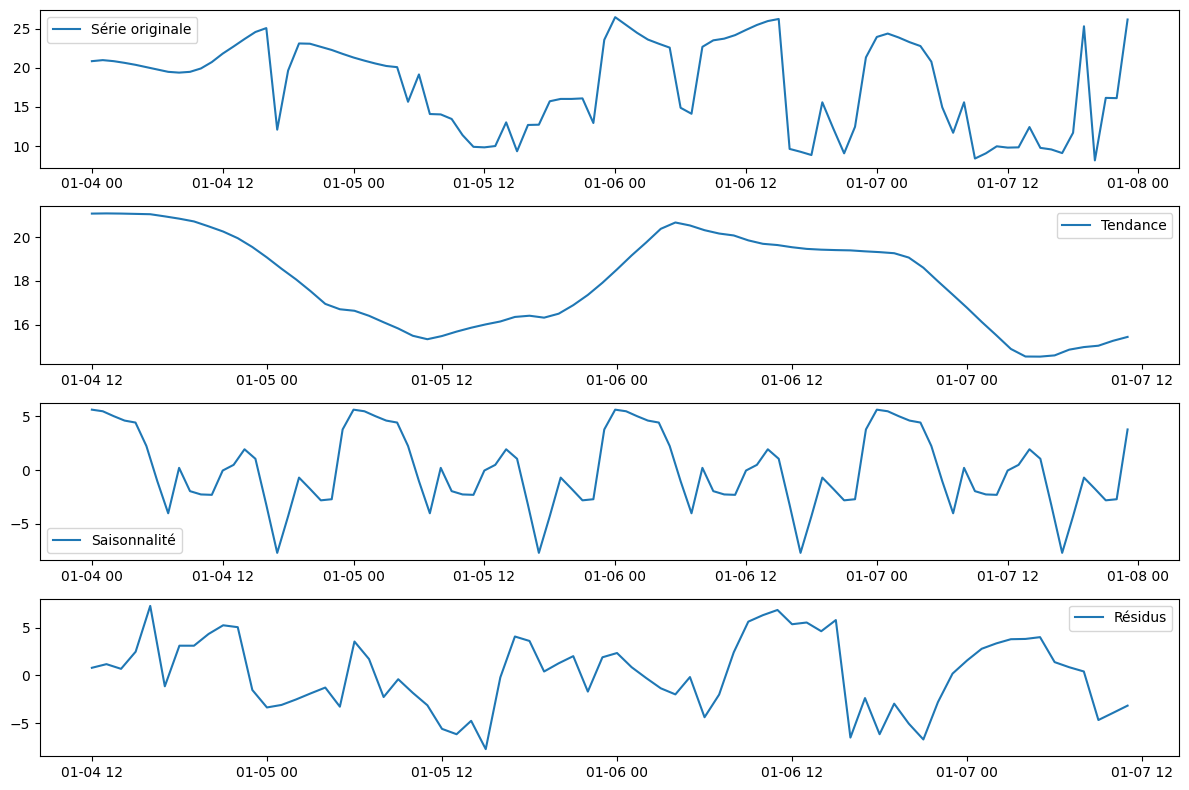

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose
# Effectuer la décomposition saisonnière
decomposition = seasonal_decompose(data['Hourly_Temp'], model='additive')

# Extraire les composantes de la décomposition
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Afficher les composantes de la décomposition
plt.figure(figsize=(12, 8))

plt.subplot(411)
plt.plot(data['Hourly_Temp'], label='Série originale')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend, label='Tendance')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(seasonal, label='Saisonnalité')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(residual, label='Résidus')
plt.legend(loc='best')

plt.tight_layout()
plt.show()

La tendance n'est pas linéaire.

On peut appliquer directement le modèle ARMA.

### 5) Tracer et Analyser les corrélogrammes simple et partiel de la série pour un décalage d’ordre 𝐾 ≥ 36. Interpréter ces résultats.

On choisit K = 40 > 36

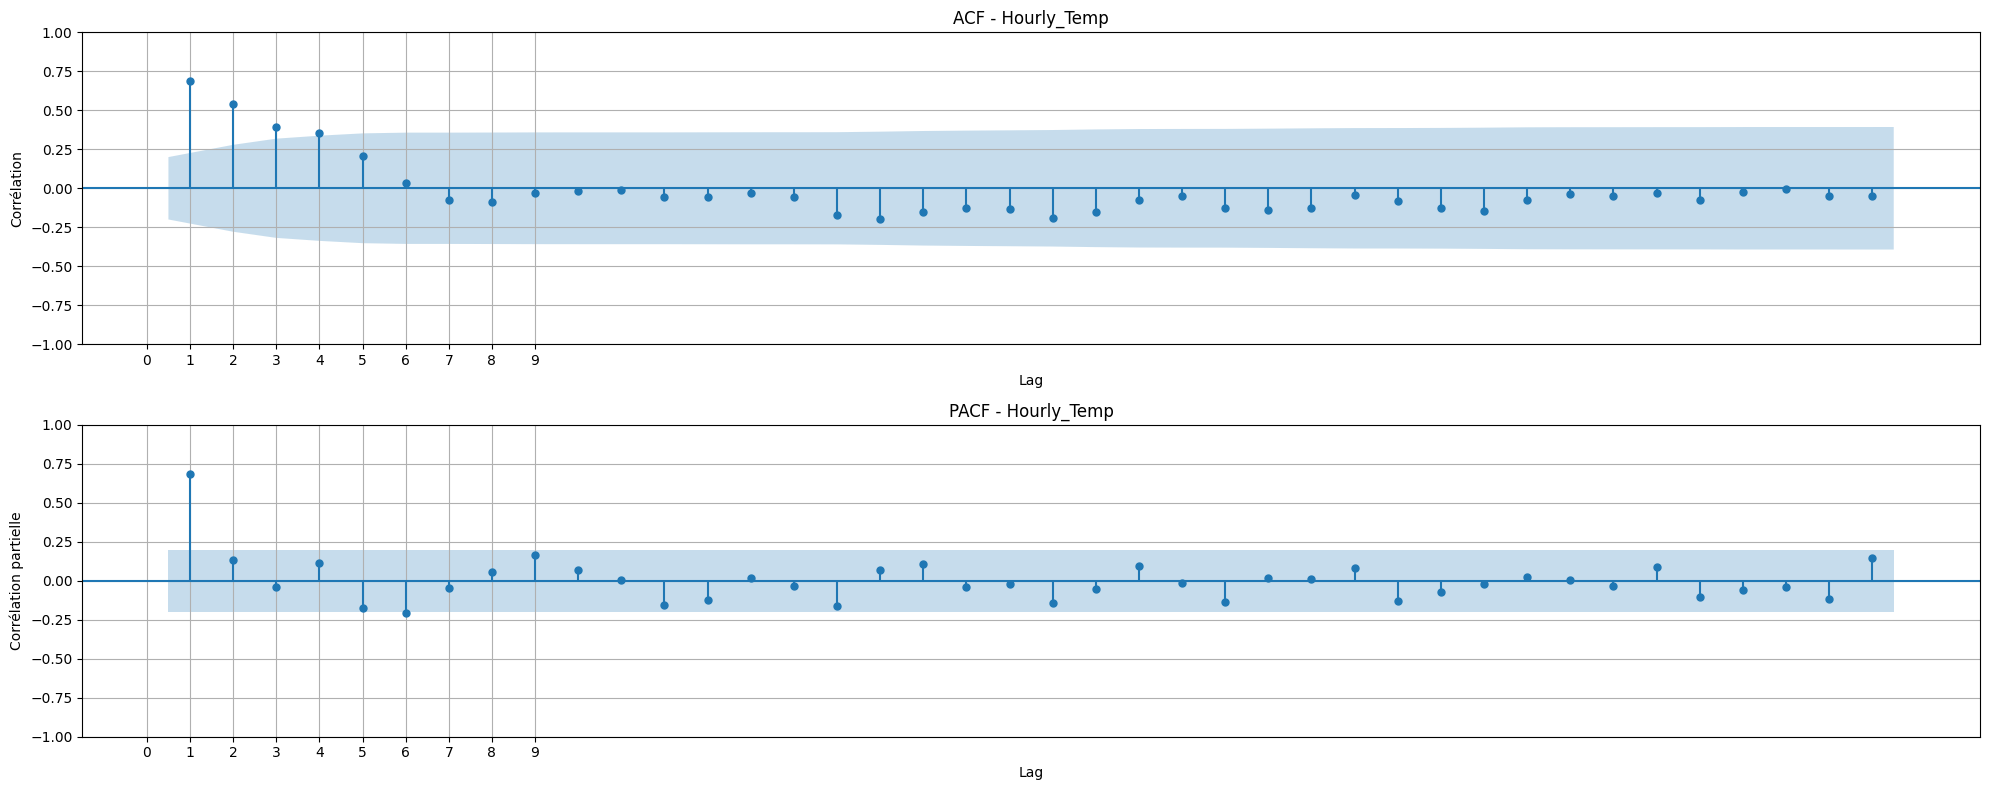

In [12]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import numpy as np
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 8))
plot_acf(data['Hourly_Temp'], lags=40, zero=False, ax=ax1)
ax1.set_title('ACF - Hourly_Temp')
ax1.set_xlabel('Lag')
ax1.set_ylabel('Corrélation')
ax1.grid(True)

ax1.set_xticks(np.arange(0, 10, 1))

plot_pacf(data['Hourly_Temp'], lags=40, zero=False, ax=ax2)
ax2.set_title('PACF - Hourly_Temp')
ax2.set_xlabel('Lag')
ax2.set_ylabel('Corrélation partielle')
ax2.grid(True)

ax2.set_xticks(np.arange(0, 10, 1))

plt.tight_layout()

plt.show()


Donc on prend p_max=1 et q_max=4.
Maintenant, passons à la validation (On cherche les meilleurs valeurs pour p et q)

Après différenciation,

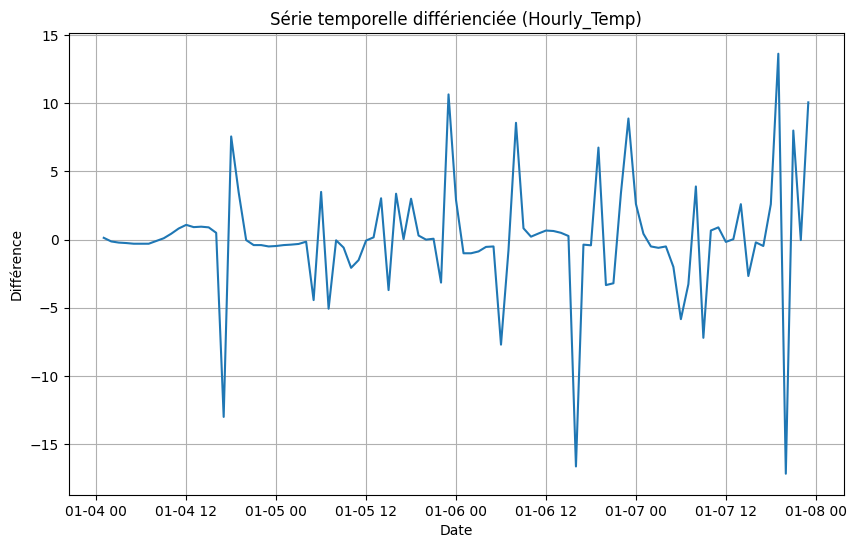

In [13]:
# Différenciation pour rendre la série stationnaire
ddata = data['Hourly_Temp'].diff().dropna()

# Afficher la série différienciée
plt.figure(figsize=(10, 6))
plt.plot(ddata)
plt.title('Série temporelle différienciée (Hourly_Temp)')
plt.xlabel('Date')
plt.ylabel('Différence')
plt.grid(True)
plt.show()

on remarque qu'on a éliminer la tendance.

### 6) Appliquer la méthode de Box et Jenkins sur votre série.

On applique la recherche automatique des paramètres de ARIMA (Sélection de AIC le plus petit)

In [14]:
import pmdarima as pm
model = pm.auto_arima(data)

print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   96
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -271.178
Date:                Sun, 12 May 2024   AIC                            548.357
Time:                        23:44:43   BIC                            556.050
Sample:                    01-04-2022   HQIC                           551.466
                         - 01-07-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      5.5079      2.085      2.642      0.008       1.422       9.594
ar.L1          0.6966      0.120      5.798      0.000       0.461       0.932
sigma2        16.5231      2.850      5.798      0.0

Donc on applique le modèle ARIMA(1,0,0) avec constante. Les valeurs sont bien significatifs (proba inférieur à 0.05)

Maintenant, on analyse les fonctions ACF et PACF des résidus :

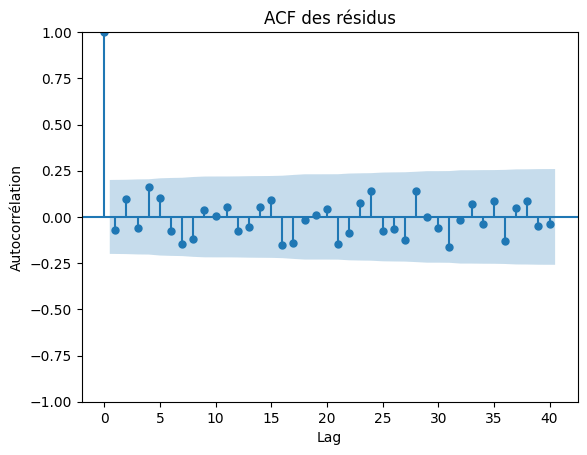

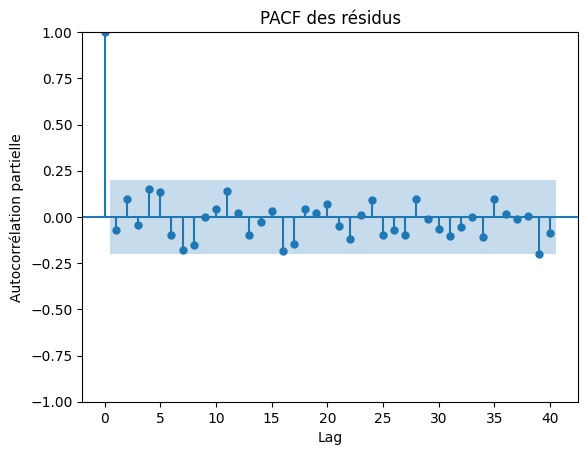

In [15]:
model.fit(donnees_apprentissage)

residuels = model.resid()
plot_acf(residuels, lags=40)
plt.xlabel('Lag')
plt.ylabel('Autocorrélation')
plt.title('ACF des résidus')
plt.show()
plot_pacf(residuels, lags=40)
plt.xlabel('Lag')
plt.ylabel('Autocorrélation partielle')
plt.title('PACF des résidus')
plt.show()

Toutes les valeurs appartiennent à l'intervalle de confiance. On a trouvé alors le bon modèle : ARIMA(1,0,0)

### 7) Représenter graphiquement la série ainsi que la prévision.

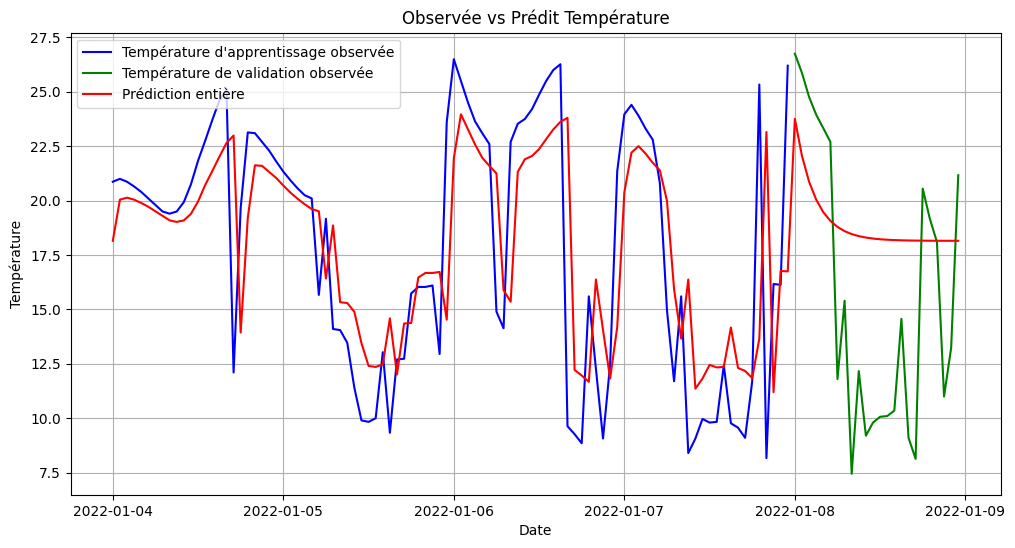

In [16]:
train_pred, train_confint = model.predict_in_sample(return_conf_int=True)

# Faire des prédictions sur l'ensemble de test
n_periods = len(donnees_validation)
predicted, confint = model.predict(n_periods=n_periods, return_conf_int=True)

# Concaténer les prédictions pour l'ensemble d'entraînement et de test
all_predictions = pd.concat([pd.Series(train_pred, index=donnees_apprentissage.index), 
                             pd.Series(predicted, index=donnees_validation.index)], 
                            axis=0)

# Tracer les valeurs réelles et les prédictions pour l'ensemble d'entraînement et de test
plt.figure(figsize=(12, 6))
plt.plot(donnees_apprentissage, label='Température d\'apprentissage observée', color='blue')
plt.plot(donnees_validation, label='Température de validation observée', color='green')
plt.plot(all_predictions, label='Prédiction entière', color='red')

plt.xlabel('Date')
plt.ylabel('Température')
plt.title('Observée vs Prédit Température')
plt.legend()
plt.grid(True)
plt.show()


### 8) Evaluer les prévisions obtenues et interpréter les résultats.

In [17]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Calculer les mesures de performance sur l'ensemble d'entraînement
train_mae = mean_absolute_error(data, train_pred)
train_mse = mean_squared_error(data, train_pred)
train_rmse = mean_squared_error(data, train_pred, squared=False)
train_r2 = r2_score(data, train_pred)

# Calculer les mesures de performance sur l'ensemble de test
test_mae = mean_absolute_error(donnees_validation, predicted)
test_mse = mean_squared_error(donnees_validation, predicted)
test_rmse = mean_squared_error(donnees_validation, predicted, squared=False)
test_r2 = r2_score(donnees_validation, predicted)

# Créer un DataFrame pour afficher les mesures de performance
performance_df = pd.DataFrame({
    'Métrique': ['MAE', 'MSE', 'RMSE', 'R²'],
    'Ensemble d\'entraînement': [train_mae, train_mse, train_rmse, train_r2],
    'Ensemble de test': [test_mae, test_mse, test_rmse, test_r2]
})

print(performance_df)


  Métrique  Ensemble d'entraînement  Ensemble de test
0      MAE                 2.842953          5.516769
1      MSE                16.560299         38.993486
2     RMSE                 4.069435          6.244476
3       R²                 0.481680          0.013802


c:\Users\Ahmed\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Ahmed\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


La qualité du modèle est de 48% en l'appliquant en données d'apprentissage, mais très faible pour les données de test.